## Fit for $\phi$ Spin Denisty Matrix elements with linear polarisation

This code performs an extended maximum likelihood fit for 9 SDMEs in $\phi$ photoproduction.
For this example just one large kinematic bin is selected.

In [1]:
gROOT->ProcessLine(".x $HSCODE/hsfit/LoadHSFit.C+");

%%%%%%%%%%%%%%%%%%%%%%%%%    Weights
%%%%%%%%%%%%%%%%%%%%%%%%%    Bins
FFFFFFFFFFFFFFFFFFFFFFFFF RooHSEventsPDF

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

FFFFFFFFFFFFFFFFFFFFFFFFF RooHSEventsHistPDF
FFFFFFFFFFFFFFFFFFFFFFFFF HSMCMC
FFFFFFFFFFFFFFFFFFFFFFFFF HSRooFit
FFFFFFFFFFFFFFFFFFFFFFFFF HSsPlot


Load predefined SDME PDF based on Schilling and Wolf. Soon it will be possible directly create this PDF within a notebook.

In [2]:
gROOT->ProcessLine(".x VectorSDME.cxx+");

(VectorSDME) Name:  Title: 


Create fit class based on RooFit. Final results will be saved to outSDME

In [3]:
  HSRooFit* RF=new HSRooFit("phiSDME");
  RF->SetOutDir("outSDME/");

Load fit observables

        MesonPhi : production plane angle relative to linear polarisation
        HelCosTh : decay angle of phi in helicit frame
        HelPhi : azimuthal decay angle of phi in helicity frame
        Pol : degree of linear polarisation of photon
        PolState: parallel or perpindicular polarisation
        
Cut on observables, these should be the same as sPlot although they will not contribute to likelihood if there are outwith the sPlot limits.

        Eg : photon beam energy range 
        MesonCosTh : CoM production angle of phi
        MesonMass : range of M(2K) used in sPlot
        MLP : cut on TMVA MultiLayerPeceptron 
        Topo : use topologies pK+ and pK-
        

In [4]:
 ///////////////////////////////Load Variables
  RF->LoadVariable("MesonPhi[-3.1416,3.1416]");//should be same name as variable in tree 
  RF->LoadVariable("HelCosTh[-1,1]");//should be same name as variable in tree 
  RF->LoadVariable("HelPhi[-3.1416,3.1416]");//should be same name as variable in tree 
  RF->LoadVariable("Pol[0,1]");//should be same name as variable in tree  

  RF->LoadAuxVars("Eg[1.7,1.9]");//Not to be fitted but limits applied to dataset
  RF->LoadAuxVars("MesonCosTh[-0.5,0.5]");//Not to be fitted but limits applied to dataset
  RF->LoadAuxVars("MesonMass[0.99,1.05]");//Not to be fitted but limits applied to dataset
  RF->LoadAuxVars("MLP[0.98,1]");//Not to be fitted but limits applied to dataset
  RF->LoadAuxVars("Topo[0.5,2.5]");//Not to be fitted but limits applied to dataset
  RF->LoadVariable("PolState[Polp=1,Polm=-1]");//Load a category

Create fit function and provide some limits to parameters

In [5]:
 RF->Factory("VectorSDME::PhiSDME(HelCosTh,HelPhi,MesonPhi,Pol,PolState,rho000[0.3,-0.5,0.5],Rerho010[-0.1,-0.5,0.5],rho01m1[0.05,-0.5,0.5],rho111[0,-0.5,0.5],rho100[0,-0.5,0.5],Rerho110[0.02,-0.5,0.5],rho11m1[0.2,-0.5,0.5],Imrho210[-0.1,-0.5,0.5],Imrho21m1[0.2,-0.5,0.5])");
 RooHSEventsPDF* pdf=dynamic_cast<RooHSEventsPDF*>(RF->GetWorkSpace()->pdf("PhiSDME"));

Load the simulated events to the PDF for MC integrations for acceptance corrected normalisation integrals

In [6]:
auto sfile=new TFile("/work/g8dump/hsexamples/converttestmvamlpinc2_sim.root");
auto stree=(TTree*)sfile->Get("newtree");
pdf->SetEvTree(stree,RF->GetCut());

HelCosTh
0
HelPhi
0
MesonPhi
0
Pol
RooHSEventsPDF::SetEvTree Ammended cut MesonPhi>=-3.141600&&MesonPhi<=3.141600&&HelCosTh>=-1.000000&&HelCosTh<=1.000000&&HelPhi>=-3.141600&&HelPhi<=3.141600&Eg>=1.700000&&Eg<=1.900000&&MesonCosTh>=-0.500000&&MesonCosTh<=0.500000&&MesonMass>=0.990000&&MesonMass<=1.050000&&MLP>=0.980000&&MLP<=1.000000&&Topo>=0.500000&&Topo<=2.500000


Info in <VectorSDME::RooHSEventsPDF::SetEvTree>:  with name newtree and cut MesonPhi>=-3.141600&&MesonPhi<=3.141600&&HelCosTh>=-1.000000&&HelCosTh<=1.000000&&HelPhi>=-3.141600&&HelPhi<=3.141600&&Pol>=0.000000&&Pol<=1.000000&&Eg>=1.700000&&Eg<=1.900000&&MesonCosTh>=-0.500000&&MesonCosTh<=0.500000&&MesonMass>=0.990000&&MesonMass<=1.050000&&MLP>=0.980000&&MLP<=1.000000&&Topo>=0.500000&&Topo<=2.500000
Warning in <VectorSDME::RooHSEventsPDF::SetEvTree>: Branch Pol not found
Warning in <VectorSDME::RooHSEventsPDF::SetEvTree>: Branch PolState not found


tree entries 266366 4


In [7]:
 RF->LoadSpeciesPDF("PhiSDME",1);

Load the data. This should be the same file as for the sPlot fit

In [8]:
auto dfile=new TFile("/work/g8dump/hsexamples/converttestmvamlpinc2b.root");
auto dtree=(TTree*)dfile->Get("newtree");
RF->SetIDBranchName("UID");
RF->LoadDataSet(dtree);


[#1] INFO:DataHandling -- RooAbsCategory::attachToTree(PolState) TTree branch PolState will be interpreted as category index
[#1] INFO:Eval -- RooAbsReal::attachToTree(Topo) TTree Int_t branch Topo will be converted to double precision
[#1] INFO:Eval -- RooTreeDataStore::loadValues(newtree) Ignored 18464 out of range events
HSRooFit::LoadDataSet(TTree*) Print dataset for newtree
RooDataSet::newtree[MesonPhi,HelCosTh,HelPhi,Pol,PolState,Eg,MesonCosTh,MesonMass,MLP,Topo,UID] = 16314 entries


Load the weights from the sPlot. Choose species Phi (see sPlot notebook)

In [9]:
  RF->LoadWeights("out2/WeightsSF.root ","HSsWeights");
  RF->SetWeightName("Phi"); //Same as Signal species in FitHSSimpleBins
  RF->SetDataWeight();
  RF->GetDataSet()->Print();

void HSRooFit::LoadWeights out2/WeightsSF.root  HSsWeights
TFile**		out2/WeightsSF.root	
 TFile*		out2/WeightsSF.root	
  KEY: TTree	HSsWeights_W;1	Tree weights for each species
  KEY: TTree	HSsWeights_ID;1	event ids for each entry
  KEY: HS::Weights	HSsWeights;1	SF
HSsWeights SF
Weights HSsWeights contains 16314 events associated file is 
ID branch name : UID
Species are : 
BG
Phi
The first ten entries are :
271861 -0.299598 1.29956 
275878 -0.586851 1.58681 
277955 1.66024 -0.660263 
285811 -0.505197 1.50516 
291832 -0.594136 1.59409 
299296 1.22637 -0.226392 
300094 -0.576001 1.57596 
301113 -0.632388 1.63235 
305798 1.71078 -0.710797 
309577 1.49803 -0.498051 
RooArgList:: = (Phi)
HSRooFit::SetDataWeight() Print data 
RooDataSet::newtree[MesonPhi,HelCosTh,HelPhi,Pol,PolState,Eg,MesonCosTh,MesonMass,MLP,Topo,UID] = 16314 entries
Weights::BuildIndex 16314
Done


Error in <TBranch::TBranch::WriteBasketImpl>: basket's WriteBuffer failed.

Error in <TBranch::TBranch::Fill>: Failed to write out basket.

Error in <TTree::Fill>: Failed filling branch:HSsWeights_W.Phi, nbytes=-1, entry=3990
 This error is symptomatic of a Tree created as a memory-resident Tree
 Instead of doing:
    TTree *T = new TTree(...)
    TFile *f = new TFile(...)
 you should do:
    TFile *f = new TFile(...)
    TTree *T = new TTree(...)


Error in <TBranch::TBranch::WriteBasketImpl>: basket's WriteBuffer failed.

Error in <TBranch::TBranch::Fill>: Failed to write out basket.

Error in <TTree::Fill>: Failed filling branch:HSsWeights_W.BG, nbytes=-1, entry=3990
 This error is symptomatic of a Tree created as a memory-resident Tree
 Instead of doing:
    TTree *T = new TTree(...)
    TFile *f = new TFile(...)
 you should do:
    TFile *f = new TFile(...)
    TTree *T = new TTree(...)


Error in <TBranch::TBranch::WriteBasketImpl>: basket's WriteBuffer failed.

Error in <TBranch

RooDataSet::weights[Phi] = 16314 entries
RooDataSet::newtree[MesonPhi,HelCosTh,HelPhi,Pol,PolState,Eg,MesonCosTh,MesonMass,MLP,Topo,UID,Phi] = 16314 entries
RooDataSet::Weight_Phinewtree[MesonPhi,HelCosTh,HelPhi,Pol,PolState,Eg,MesonCosTh,MesonMass,MLP,Topo,UID,weight:Phi] = 16314 entries (3331.11 weighted)
RooDataSet::Weight_Phinewtree[MesonPhi,HelCosTh,HelPhi,Pol,PolState,Eg,MesonCosTh,MesonMass,MLP,Topo,UID,weight:Phi] = 16314 entries (3331.11 weighted)


To correctly calculate the normalisation integral the simulation needs values for polarisation and polarisation state that matches the experimental data. This is handled in AddProData.

In [10]:
pdf->AddProtoData(RF->GetDataSet());

RooHSEventsPDF::AddProtoData 0x7f31ac86c3b4 0x7f31d6e923d0
RooArgSet::VarSet_0 = (HelCosTh,HelPhi,MesonPhi,Pol,PolState)
RooArgSet:: = (MesonPhi,HelCosTh,HelPhi,Pol,PolState,Eg,MesonCosTh,MesonMass,MLP,Topo,UID)
16314
Add branches 0x7f31d6e923d0


Info in <VectorSDME::RooHSEventsPDF::AddProtoData>: Added data branch Pol
Info in <VectorSDME::RooHSEventsPDF::AddProtoData>: Added data branch PolState
Info in <VectorSDME::RooHSEventsPDF::AddProtoData>: Added data branch UID


Do a fit! 

In [11]:
RF->TotalPDF();
RF->RunAFit(1);

HSRooFit::TotalPDF() 0x7f31d6ca3b90 0
RooAddPdf::phiSDMETotalPDF[ Yld_PhiSDME * PhiSDME ] = 0.942478
HSRooFit::TotalPDF() phiSDMETotalPDF0
[#1] INFO:ObjectHandling -- RooWorkspace::import(wHS) importing RooAddPdf::phiSDMETotalPDF0
[#1] INFO:ObjectHandling -- RooWorkspace::import(wHS) using existing copy of VectorSDME::PhiSDME for import of RooAddPdf::phiSDMETotalPDF0
[#1] INFO:ObjectHandling -- RooWorkspace::import(wHS) using existing copy of RooRealVar::HelCosTh for import of RooAddPdf::phiSDMETotalPDF0
[#1] INFO:ObjectHandling -- RooWorkspace::import(wHS) using existing copy of RooRealVar::HelPhi for import of RooAddPdf::phiSDMETotalPDF0
[#1] INFO:ObjectHandling -- RooWorkspace::import(wHS) using existing copy of RooRealVar::MesonPhi for import of RooAddPdf::phiSDMETotalPDF0
[#1] INFO:ObjectHandling -- RooWorkspace::import(wHS) using existing copy of RooRealVar::Pol for import of RooAddPdf::phiSDMETotalPDF0
[#1] INFO:ObjectHandling -- RooWorkspace::import(wHS) using existing copy of 

Info in <HS::FIT::HSRooFit::HSRooFit::Fit()>:  Starting


[#1] INFO:Minization -- createNLL: caching constraint set under name CONSTR_OF_PDF_phiSDMETotalPDF0_FOR_OBS_Eg:HelCosTh:HelPhi:MLP:MesonCosTh:MesonMass:MesonPhi:Pol:PolState:Topo:UID with 0 entries
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#0] WARNING:Optimization -- RooAbsOptTestStatistic::optimizeConstantTerms(nll_phiSDMETotalPDF0_Weight_Phinewtree) WARNING Cache-and-track optimization (Optimize level 2) is only available for datasets implement in terms of RooVectorDataStore - ignoring this option for current dataset
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 Imrho210    -1.00000e-01  1.00000e-01   -5.00000e-01  5.00000e-01
     2 Imrho21m1    2.00000e-01  1.00000e-01   -5.00000e-01  5.00000e-01
     3 Rerho010    -1.00000e-01  1.00000e-01   -5.00000e-01  5.00000e-01
     4 Rerho110     2.00000e-02

1 HSRooFit::PlotDataModel() chi2 = 1.27979
[#1] INFO:Plotting -- RooAbsPdf::plotOn(phiSDMETotalPDF0) directly selected PDF components: (PhiSDME)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(phiSDMETotalPDF0) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsReal::plotOn(phiSDMETotalPDF0) plot on MesonPhi integrates over variables (HelCosTh,HelPhi,Pol,PolState)
4 0x7f31b2d2ba90 0x7f31d62dadf0
Plotting HelCosTh
[#1] INFO:Plotting -- RooAbsReal::plotOn(phiSDMETotalPDF0) plot on HelCosTh integrates over variables (MesonPhi,HelPhi,Pol,PolState)
1 HSRooFit::PlotDataModel() chi2 = 1.4014
[#1] INFO:Plotting -- RooAbsPdf::plotOn(phiSDMETotalPDF0) directly selected PDF components: (PhiSDME)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(phiSDMETotalPDF0) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsReal::plotOn(phiSDMETotalPDF0) plot on HelCosTh integrates over variables (MesonPhi,HelPhi,Pol,PolState)
4 0x7f31b2db75e0 0x7f31d6f52a60
Plotting HelPhi
[#1] INFO:Plotting -

Info in <HS::FIT::HSRooFit::HSRooFit::Fit()>:  Starting


[#1] INFO:Minization -- createNLL picked up cached consraints from workspace with 0 entries
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#0] WARNING:Optimization -- RooAbsOptTestStatistic::optimizeConstantTerms(nll_phiSDMETotalPDF0_Weight_Phinewtree) WARNING Cache-and-track optimization (Optimize level 2) is only available for datasets implement in terms of RooVectorDataStore - ignoring this option for current dataset
 **********
 **   10 **SET PRINT           1
 **********
 **********
 **   11 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 Imrho210     1.14301e-01  1.54406e-02   -5.00000e-01  5.00000e-01
     2 Imrho21m1    1.69153e-01  2.21039e-02   -5.00000e-01  5.00000e-01
     3 Rerho010    -9.59871e-02  6.81660e-03   -5.00000e-01  5.00000e-01
     4 Rerho110     1.12431e-01  1.30853e-02   -5.00000e-01  5.00000e-01
     5 Yld_PhiSDME   1.66556e+03  5.77110e+01    0.00000e+00  6.

 COVARIANCE MATRIX CALCULATED SUCCESSFULLY
 FCN=-90721.3 FROM HESSE     STATUS=OK            120 CALLS         453 TOTAL
                     EDM=585.962    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                INTERNAL      INTERNAL  
  NO.   NAME      VALUE            ERROR       STEP SIZE       VALUE   
   1  Imrho210     1.14314e-01   7.83085e-03   4.76633e-02   2.30669e-01
   2  Imrho21m1    1.69108e-01   1.10766e-02   1.49490e-01   3.45020e-01
   3  Rerho010    -9.59727e-02   3.34759e-03   4.28539e-02  -1.93144e-01
   4  Rerho110     1.12367e-01   6.87129e-03   8.59778e-02   2.26671e-01
   5  Yld_PhiSDME   3.33113e+03   2.94795e+01   1.50992e-03   4.61832e-06
   6  rho000       3.27083e-01   6.96768e-03   1.13976e-01   7.13080e-01
   7  rho01m1      7.82000e-02   5.48141e-03   6.66805e-02   1.57045e-01
   8  rho100      -1.16301e-01   1.24663e-02   6.97448e-02  -2.34753e-01
   9  rho111       5.64379e-02   8.59810e-03   4.79881e-02   1.13117e-01
 

Info in <HS::FIT::HSRooFit::HSRooFit::RunAFit>: Save to outSDME//ResultsphiSDME


%jsroot

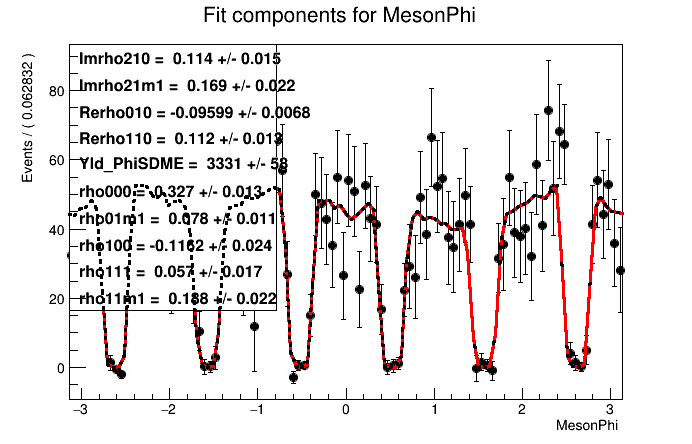

In [12]:
 c1=((TCanvas*)RF->GetPlots()->At(0)->Clone());
c1->Draw();

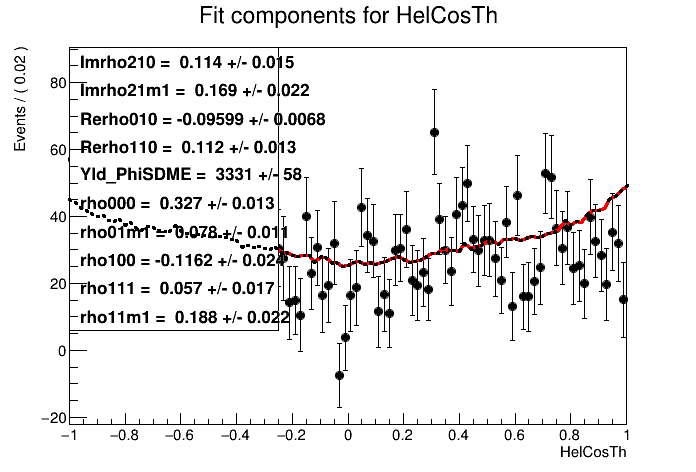

In [13]:
((TCanvas*)RF->GetPlots()->At(1))->Draw()

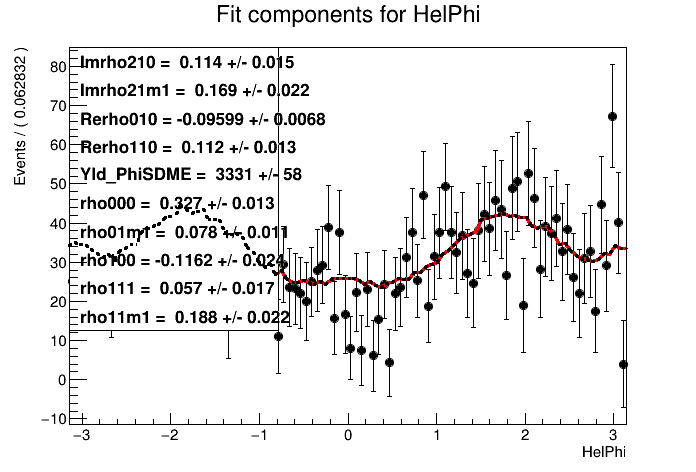

In [14]:
((TCanvas*)RF->GetPlots()->At(2))->Draw()

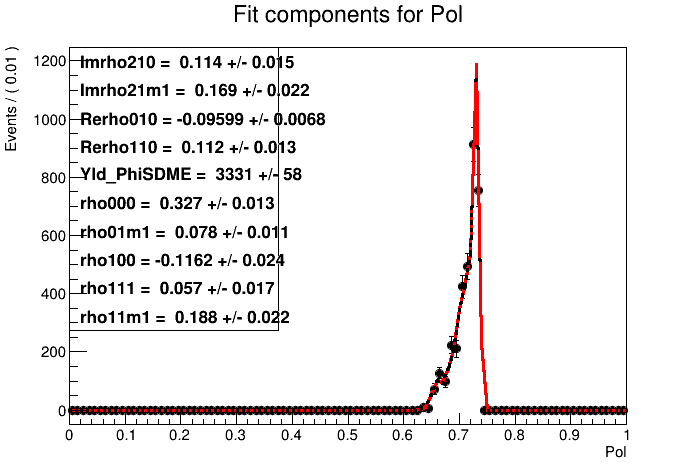

In [15]:
((TCanvas*)RF->GetPlots()->At(3))->Draw()